In [4]:
### IMPORT SCIENTIFIC LIBRARIES ###
import numpy as np
import pandas as pd
from scipy import sparse
from scipy.optimize import curve_fit
import importlib

import matplotlib.pyplot as plt
#import seaborn as sns
plt.rcParams['font.size'], plt.rcParams['axes.labelsize'] = 14, 18
#%matplotlib widget

from tqdm import tqdm
import io, sys
from contextlib import redirect_stdout, redirect_stderr

import os

import h5py
import hdf5plugin

import sys
sys.path.append('./XPCS_library/')

import ID10_tools as ID10
from ID10_tools import Nx, Ny, Npx
importlib.reload(ID10)
ID10.set_version('v2')

import XPCS_tools as XPCS
from XPCS_tools import E2lambda, lambda2E, theta2Q, Q2theta, decorelation_f
importlib.reload(XPCS)
XPCS.set_beamline('ID10')
XPCS.set_expvar(Nx//2, Ny//2, 7)

import COSMICRAY_tools as COSMIC
importlib.reload(COSMIC)
COSMIC.set_beamline('ID10')

# RAW FOLDER PATH
raw_folder = '../RAW_DATA_pre/'
masks_folder = '../masks/'

# Generation of the beamstop mask

### Load 1st copper foil scan (copper_foil_30um, 1, 1)

In [5]:
#######################################
sample_name = 'copper_foil_30um'
Ndataset = 1
Nscan = 1
#######################################

scan = ID10.load_scan(raw_folder, sample_name, Ndataset, Nscan)
itime = scan['itime']
theta = scan['delcoup']

print('#############################')
print('command =', scan['command'])
print('itime =', itime)
print('theta =', theta)
print('#############################\n')

len_dataset_string =ID10.len_dataset_string
df_eiger4m_entry = ID10.df_eiger4m_entry

# LOAD MASTER DATASET FILE
e4m_file = raw_folder + sample_name+'/' +sample_name+'_'+str(Ndataset).zfill(len_dataset_string)+'/' + sample_name+'_'+str(Ndataset).zfill(len_dataset_string)+'.h5'
h5file = h5py.File(e4m_file, 'r')[str(Nscan)+'.1']

# LOAD EIGER4M DF LINK
df = h5file['measurement'][df_eiger4m_entry]

#############################
command = ftimescan 0.1 36000 0
itime = 0.100106
theta = 0.0
#############################



### Load part of the copper foil data

In [6]:
#############
Nfi = 0
Nff = 1000
#############

e4m_data = sparse.csr_array(df[Nfi:Nff].reshape(Nff-Nfi, Npx))

### First look

################################################################################
Maximum count in the hull run -> 4294967295
# of pixels above Ith_high treshold ->  96756 pixels (of 4471016 => 2.16 %)
# of pixels above Imaxth_high treshold ->  5609 pixels (of 4471016 => 0.13 %)
################################################################################



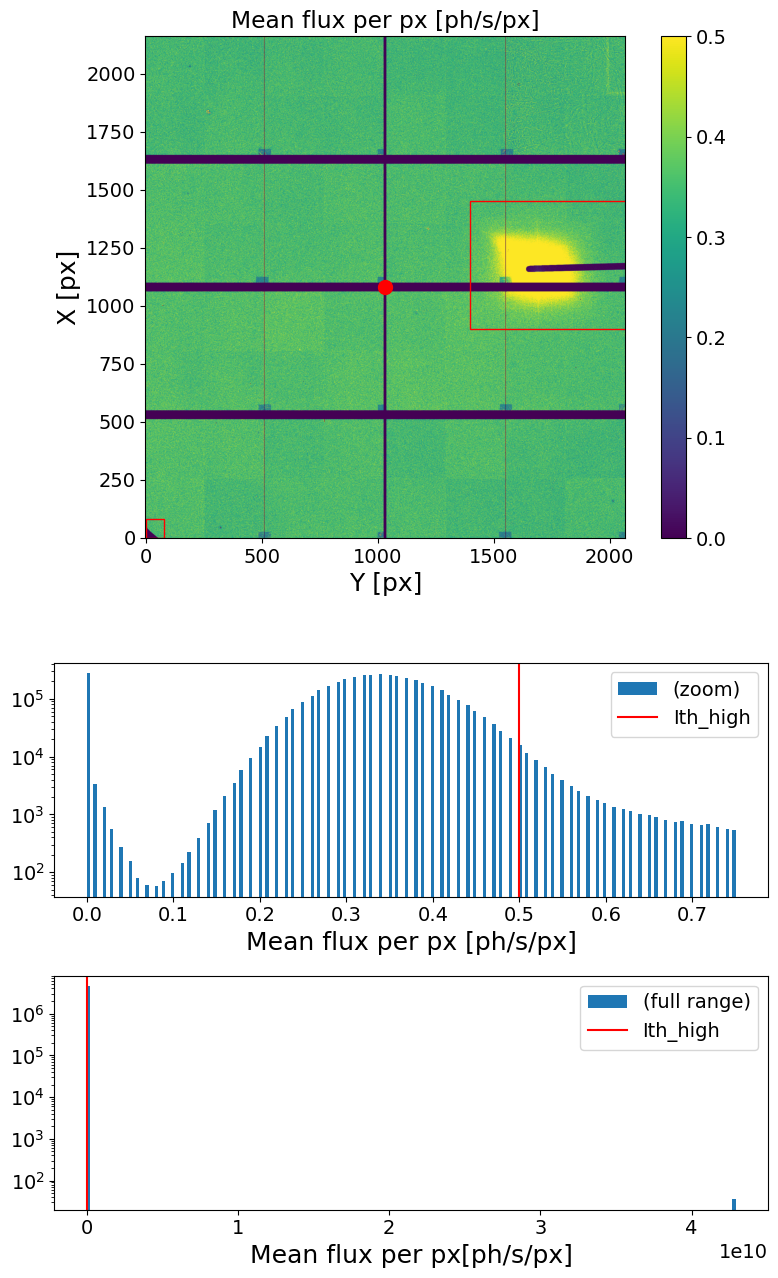

In [10]:
geom = [{'geom':'Rectangle', 'x0':900, 'y0':1400, 'xl':550, 'yl':950, 'inside':False},
        {'geom':'Rectangle', 'x0':0, 'y0':0, 'xl':80, 'yl':80, 'inside':False}    
        ]

XPCS.gen_plots4mask(e4m_data, itime, Ith_high=.5, Imaxth_high=5, e4m_mask=None, mask_geom=geom, Nfi=None, Nff=None, max_plots=False, wide_plots=True)

#################################################
Masked area =  91.62094253297238 %
#################################################



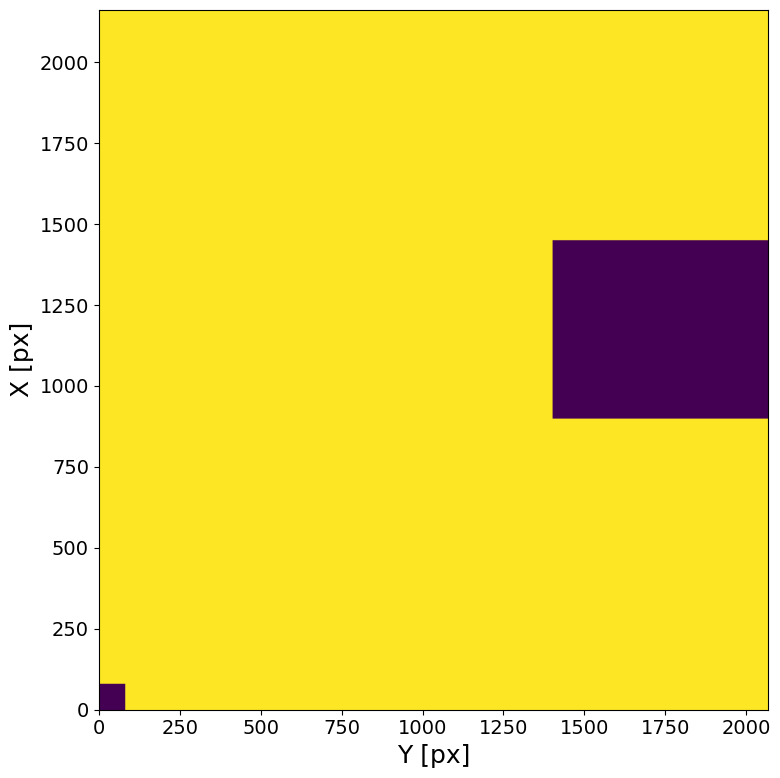

In [13]:
bs_mask = XPCS.gen_mask(e4m_data, itime, e4m_mask=None, mask_geom=geom, hist_plots=False)

# SAVE MASK
np.save(masks_folder  + 'bs_mask_copper_foil_30um.npy', bs_mask)